In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [17]:
TRAINING_DIR = '../input/dataset-ekush/Ekush_data_set/train'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                   samplewise_center=False,  # set each sample mean to 0
                                   featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                   samplewise_std_normalization=False,  # divide each input by its std
                                   zca_whitening=False,  # apply ZCA whitening
                                   rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
                                   zoom_range = 0.01, # Randomly zoom image 
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   horizontal_flip=False,  # randomly flip images
                                   vertical_flip=False  
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64),
                                                    )

Found 146509 images belonging to 60 classes.


In [18]:
"""
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Test',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )
                                                     """

"\ntest_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(\n                                                    '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Test',\n                                                    batch_size=128,\n                                                    class_mode='categorical',\n                                                    target_size=(64,64)\n                                                     )\n                                                     "

In [19]:
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/dataset-ekush/Ekush_data_set/val',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )

Found 36655 images belonging to 60 classes.


In [20]:
import os 
import warnings
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers, activations

In [21]:

classifier=Sequential()

classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu", input_shape=(64,64,3)))
classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.25))

classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())  
classifier.add(Dropout(.25))  

classifier.add(Conv2D(filters=256, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.25))
    
classifier.add(Flatten())

classifier.add(Dense(512,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(256,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(128,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dropout(.25))
    
classifier.add(Dense(60,activation="softmax"))




In [22]:
classifier.compile(loss='categorical_crossentropy', 
                metrics=['accuracy'],
                optimizer=Adam(learning_rate=0.00004))

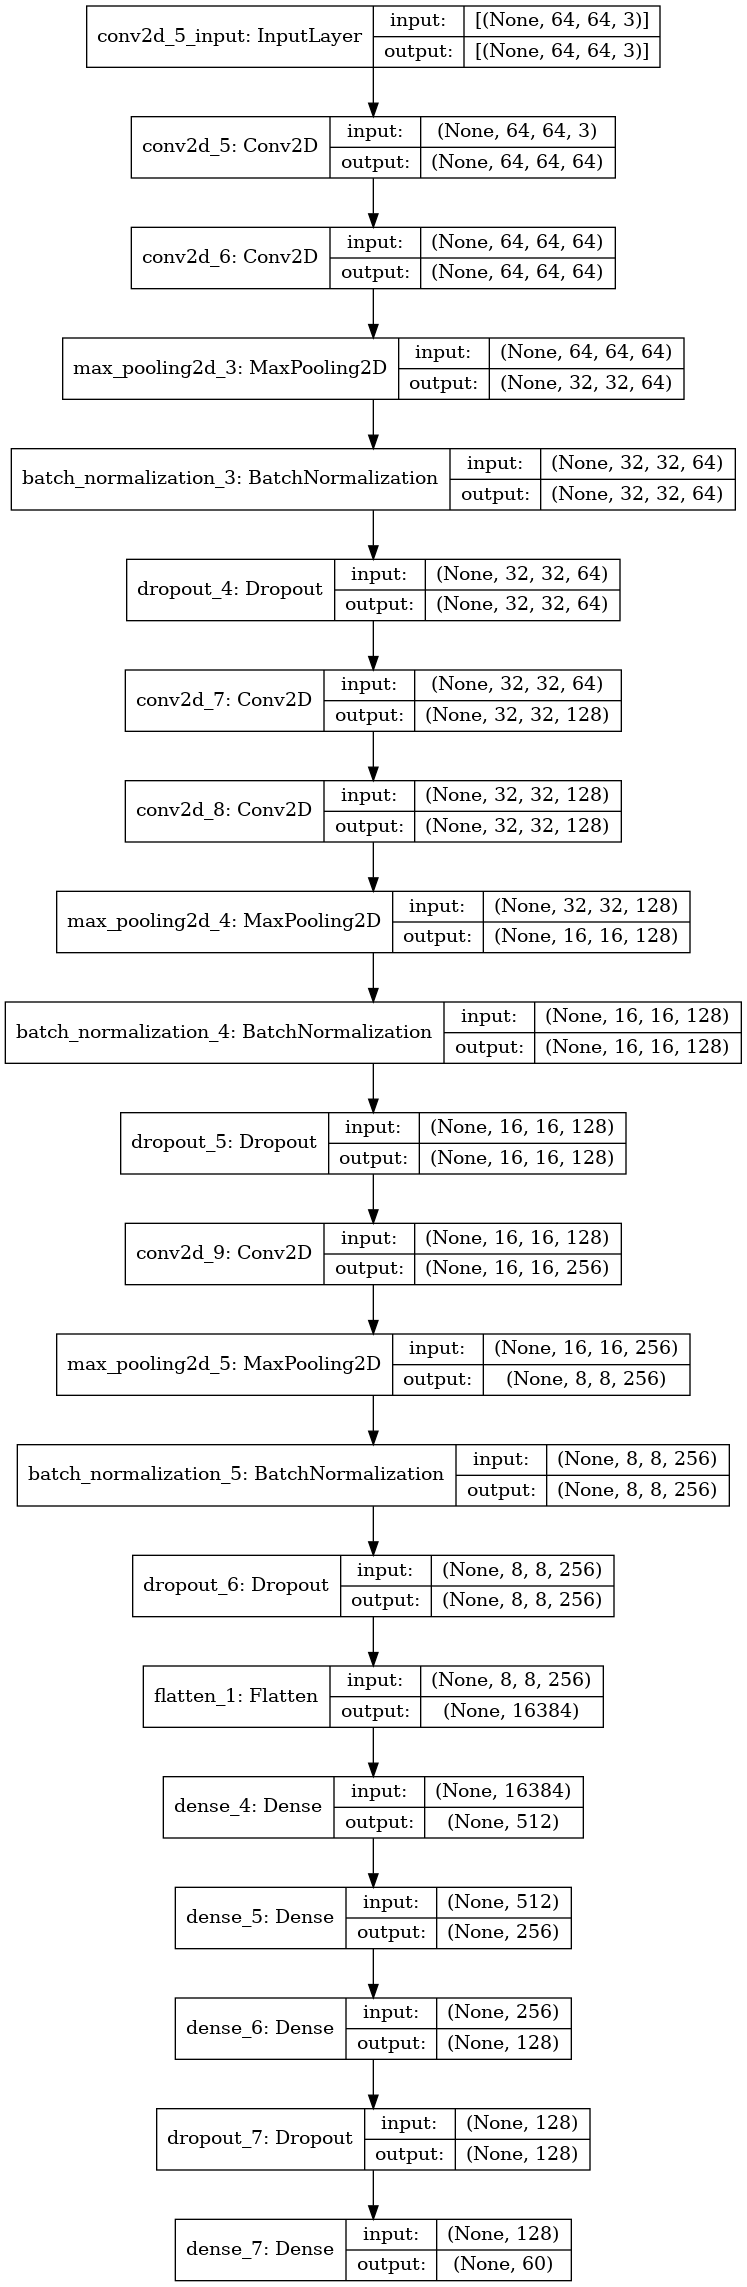

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, 'Architecture.png', show_shapes=True)

In [24]:
#Details for model
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)      

In [25]:
"""
from google.colab import files
files.download('Architecture.png')
"""

"\nfrom google.colab import files\nfiles.download('Architecture.png')\n"

In [26]:
filepath = "Final_Model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [27]:
history = classifier.fit(train_generator,steps_per_epoch = len(train_generator), epochs = 50,
                        validation_data = val_generator, validation_steps =  len(val_generator),callbacks=callbacks_list)

Epoch 1/50
1145/1145 [==============================] - 596s 519ms/step - loss: 3.7565 - accuracy: 0.4080 - val_loss: 2.2120 - val_accuracy: 0.7846

Epoch 00001: val_loss improved from inf to 2.21204, saving model to Final_Model.h5
Epoch 2/50
1145/1145 [==============================] - 332s 290ms/step - loss: 2.4772 - accuracy: 0.6921 - val_loss: 1.8406 - val_accuracy: 0.8606

Epoch 00002: val_loss improved from 2.21204 to 1.84055, saving model to Final_Model.h5
Epoch 3/50
1145/1145 [==============================] - 329s 288ms/step - loss: 2.0815 - accuracy: 0.7771 - val_loss: 1.6304 - val_accuracy: 0.8919

Epoch 00003: val_loss improved from 1.84055 to 1.63040, saving model to Final_Model.h5
Epoch 4/50
1145/1145 [==============================] - 331s 289ms/step - loss: 1.8259 - accuracy: 0.8231 - val_loss: 1.4736 - val_accuracy: 0.9090

Epoch 00004: val_loss improved from 1.63040 to 1.47362, saving model to Final_Model.h5
Epoch 5/50
1145/1145 [==============================] - 333s

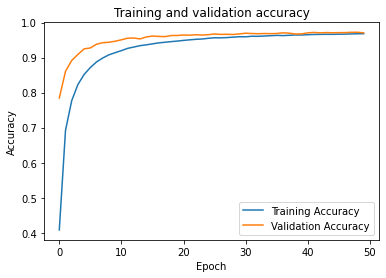

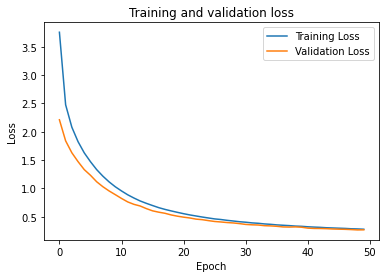

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

**Prediction **

In [29]:
loss_t, accuracy_t = classifier.evaluate(train_generator, steps=128)
loss, accuracy = classifier.evaluate(val_generator,steps=128)
loss_v, accuracy_v = classifier.evaluate(val_generator, steps=128)
print("\nTrain: accuracy = %f  ;  loss_v = %f\n" % (accuracy_t, loss_t))
print("Validation: accuracy = %f  ;  loss_v = %f\n" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f\n" % (accuracy, loss))


128/128 [==============================] - 13s 105ms/step - loss: 0.2699 - accuracy: 0.9714

Train: accuracy = 0.975525  ;  loss_v = 0.251110

Validation: accuracy = 0.971436  ;  loss_v = 0.269857

Test: accuracy = 0.971985  ;  loss = 0.268675

